In [ ]:
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.errors as errors
import azure.cosmos.http_constants as http_constants
import json
import os
import csv

url = 'https://8d4abf2e-0ee0-4-231-b9ee.documents.azure.com:443/'
key = 'is5y6iEm1oTpKeu18XppWBSzgvX231mBVwyf9JgU8jgFjMG21UVD7FbjmG7GmD9lLnrv3sBXduqmNzaOFey3uw=='
client = cosmos_client.CosmosClient(url, {'masterKey': key})

In [ ]:
databaes_name = 'AccentureData'
database = client.get_database_client(databaes_name)
query = "SELECT MAX(databaes_nam) FROM databaes_name"
properties = database.query_containers(query=query,enable_cross_partition_query=True)


In [ ]:
import pandas as pd

container_name = 'ODL_ORDER_ITEM'
container = database.get_container_client(container_name)

query = "SELECT * FROM container_name WHERE container_name.id IN ('1','2','3')"

container_dict = container.query_items(
        query=query,enable_cross_partition_query=True)

In [ ]:
containers = [container['id'] for container in database.list_containers()]
containers

In [ ]:
for container_id in containers:
    container = database.get_container_client(container_id)
    iter_items = container.read_all_items(max_item_count=1000)
    keys = container.read_item("0","0").keys()
    
    with open(f'{container_id}.csv', 'w', newline='') as output_file:
            dict_writer = csv.DictWriter(output_file, keys)
            dict_writer.writeheader()
            dict_writer.writerows(iter_items)

In [ ]:
for container_id in containers:
    container = database.get_container_client(container_id)
    iter_items = container.read_all_items(max_item_count=1000)
    keys = container.read_item
    

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 300)

read_none = ["None"]
order_item_df = pd.read_csv('/home/becode2/business_analysis/ODL_ORDER_ITEM.csv', na_values = read_none)
orderables_df = pd.read_csv('/home/becode2/business_analysis/ODL_ORDERABLES.csv', na_values = read_none)
order_df = pd.read_csv('/home/becode2/business_analysis/ODL_ORDER.csv', na_values = read_none)
allergy_customer_df = pd.read_csv('/home/becode2/business_analysis/ODL_ALLERGY_CUSTOMER.csv', na_values = read_none)
allergy_df = pd.read_csv('/home/becode2/business_analysis/ODL_ALLERGY.csv', na_values = read_none)
restaurant_df = pd.read_csv('/home/becode2/business_analysis/ODL_RESTAURANT.csv', na_values = read_none)

In [ ]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="geoapiExercises")

df = restaurant_df #dataframe is imported from csv before

nan_rest = df[df['city'].isna()] #streets with empty cities

"""first i tried to see if geocoder will find the same street in both cities"""
list_ny_street= []
for s in nan_rest['street']:
    try:
        place_ny = geolocator.geocode(f'{s}, New York')        
        if place_ny != None:
            list_ny_street.append({'street':s, 'city':'New York', 'result':place_ny})#this ditc is only so i can see the results and comapre street with place
    except:# the script will raise an error if a street is not found in NY so i skip that
        pass
    
list_sf_street= []
for s in nan_rest['street']:
    try:
        place_sf = geolocator.geocode(f'{s}, San Francisco')        
        if place_sf != None:
            list_sf_street.append({'street':s, 'city':'San Francisco', 'result':place_sf})
    except:
        pass
    
# After looking at both lists i realised that SF list was more accurate since NY list was looking at the state of NY

sf_street = []
for i in list_sf_street:#created q new list with the streets thqt belong in SF
    sf_street.append(i['street'])
    
for d1 in list_ny_street:#remove SF values that are still in NY list
    for d2 in list_sf_street:
        if d1['street'] == d2['street']:
            list_ny_street.remove(d1)
            
ny_street = []#created q new list with the final list of NY streets
for i in list_ny_street:
    ny_street.append(i['street'])
    
#added street values to the datframe

for i in ny_street:
    df.loc[df.street == i, ['city']] = "New York"

for i in sf_street:
    df.loc[df.street == i, ['city']] = "San Francisco"
    
ny_street_missing = ['Emmet Ct','Tenny Pl','Legion Memorial Square' ]
sf_street_missing = ['Doublerock St', 'Winn Way - Golden Gate National Recreation Area','S Hughes Ln - Golden Gate National Recreation Area','Harrison Blvd - Golden Gate National Recreation Area']

for i in ny_street_missing:
    df.loc[df.street == i, ['city']] = "New York"
    
for i in sf_street_missing:
    df.loc[df.street == i, ['city']] = "San Francisco"
    
df.to_csv('ODL_RESTAURANT.csv',mode='w+' ) #overwrite the csv

In [ ]:
restaurant_df

In [2]:
#avg repeat of costumer overall
order_df[['creation_date_only', 'creation_time']] = order_df['creation_date'].str.split(' ', 1, expand=True)
pd.to_datetime(order_df['creation_date_only'],format="%x")
order_df.groupby(['customer_id'])['restaurant_id'].count().sort_values(ascending=True).to_frame()['restaurant_id'].mean()


6.51563981042654

In [3]:
order_item_df_value = order_item_df.join(orderables_df[['price','name']], on='orderable_id')
order_item_df_value["order_value"] = order_item_df_value['price'].mul(order_item_df_value['amount'])
order_item_df_value #order item with total value per item

orders_value = order_item_df_value.groupby(['order_id'])['order_value'].sum().sort_values(ascending=False).to_frame()
orders_value #total value per order

order_value_df = order_df.join(orders_value['order_value'], on='id')
order_value_df['month_year']= pd.to_datetime(order_value_df['creation_date_only']).dt.strftime('%y/%m')
order_value_df['month']= pd.to_datetime(order_value_df['creation_date_only']).dt.strftime('%m')
order_value_df #total value per order with date,time, month and, month_year

,restaurant_id,creation_date,customer_id,id,creation_date_only,creation_time,order_value,month_year,month
0,91,8/25/17 18:49,2858,17265,8/25/17,18:49,131.1,17/08,08
1,91,12/20/17 11:39,10055,44615,12/20/17,11:39,155.5,17/12,12
2,91,11/23/18 10:12,13703,137232,11/23/18,10:12,247.9,18/11,11
3,91,11/2/18 17:33,14698,131091,11/2/18,17:33,146.9,18/11,11
4,91,7/24/18 9:49,14299,102153,7/24/18,9:49,128.4,18/07,07
...,...,...,...,...,...,...,...,...,...
178719,404,2/8/19 18:23,19527,161413,2/8/19,18:23,92.1,19/02,02
178720,412,3/15/19 14:46,20362,173165,3/15/19,14:46,176.9,19/03,03
178721,402,1/3/19 10:19,9193,149327,1/3/19,10:19,110.7,19/01,01
178722,400,2/4/19 18:05,15050,160047,2/4/19,18:05,57.6,19/02,02


In [ ]:
# Customer liftime value
restaurant_city = restaurant_df.set_index('data_id')
order_value__city_df = order_value_df.join(restaurant_city[['city']], on='restaurant_id')


In [68]:
# Customer liftime value part two

def ny_clv():
    ny_avg_order_value = order_value__city_df.loc[order_value__city_df['city'] == 'New York'].groupby(['customer_id'])['order_value'].sum().mean()
    ny_avg_repeat_purchase = order_value__city_df.loc[order_value__city_df['city'] == 'New York'].groupby(['customer_id'])['order_value'].count().mean()
    ny_clv = ny_avg_order_value * ny_avg_repeat_purchase
    return ny_clv

def sf_clv():
    sf_avg_order_value = order_value__city_df.loc[order_value__city_df['city'] == 'San Francisco'].groupby(['customer_id'])['order_value'].sum().mean()
    sf_avg_repeat_purchase = order_value__city_df.loc[order_value__city_df['city'] == 'San Francisco'].groupby(['customer_id'])['order_value'].count().mean()
    sf_clv = sf_avg_order_value * sf_avg_repeat_purchase
    return ny_clv()

def total_clv():
    return (ny_clv() + ny_clv()) / 2



5313.4595431411035

In [ ]:
sf_avg_order_value = order_value__city_df.loc[order_value__city_df['city'] == 'San Francisco'].groupby(['customer_id'])['order_value'].sum().mean()

535.0

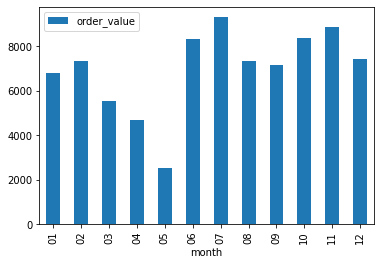

In [50]:
x = 100 #Id of restaurant
popular_month = order_value_df.loc[order_value_df['restaurant_id'] == x].groupby(['month'])['order_value'].sum().to_frame().sort_values('month').plot.bar(legend=True)
revenue_by_month = order_value_df.loc[order_value_df['restaurant_id'] == x].groupby(['month_year'])['order_value'].sum().to_frame().sort_values('month_year')
revenue_by_month.loc['17/05', 'order_value']

In [38]:
resto_value_df = order_value_df.groupby(['restaurant_id'])['order_value'].sum().sort_values(ascending=False)
resto_value_df = resto_value_df.to_frame()
restaurant_revenue = restaurant_df.join(resto_value_df['order_value'], on='id',)
restaurant_revenue = restaurant_revenue.rename(columns={"order_value":"revenue"})
restaurant_revenue # revenue per restaurant

,Unnamed: 0,id,opening_hours,city,creation_date,data_id,street,email,phone_number,name,_rid,_self,_etag,_attachments,_ts,revenue
0,0,0,12:00-23:00,San Francisco,10/15/17 20:34,268,Bayside Village Pl,rods_1890s_ranch_house@inbox.com,0499-121761,Rods 1890s Ranch House,LFZbAOhfMFoBAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""10001ce6-0000-0200-0000-622fb53c0000""",attachments/,1647293756,135954.320709
1,1,1,12:00-23:00,San Francisco,3/23/18 8:41,337,Leona Terrace,southern_railway@hotmail.com,0496-657871,Southern Railway,LFZbAOhfMFoCAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""10001de6-0000-0200-0000-622fb53c0000""",attachments/,1647293756,70929.629429
2,2,2,12:00-23:00,San Francisco,7/7/17 5:10,162,Winn Way - Golden Gate National Recreation Area,associates_of_the_enginer_corps_and_company_k@...,0495-143410,Associates Of The Enginer Corps And Company K,LFZbAOhfMFoDAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""10001ee6-0000-0200-0000-622fb53c0000""",attachments/,1647293756,67269.500000
3,3,3,12:00-23:00,San Francisco,8/7/17 16:57,193,Burgoyne St,the_cleveland_bankers@yahoo.com,0496-641689,The Cleveland Bankers,LFZbAOhfMFoEAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""10001fe6-0000-0200-0000-622fb53c0000""",attachments/,1647293756,54358.800000
4,4,4,12:00-23:00,San Francisco,7/7/17 10:37,163,Carl St,the_streamliner@gmail.com,0495-160486,The Streamliner,LFZbAOhfMFoFAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""100020e6-0000-0200-0000-622fb53d0000""",attachments/,1647293757,100038.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,420,420,08:00-21:00,New York,7/2/17 19:11,158,W 143rd St,the_radisson_hotels@inbox.com,0494-801377,The Radisson Hotels,LFZbAOhfMFqlAQAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""10008de8-0000-0200-0000-622fb5690000""",attachments/,1647293801,1926.200000
421,421,421,08:00-21:00,New York,1/11/18 22:36,311,Reade St,west_side_club@inbox.com,0495-442023,West Side Club,LFZbAOhfMFqmAQAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""10008ee8-0000-0200-0000-622fb5690000""",attachments/,1647293801,828.200000
422,422,422,08:00-21:00,New York,5/15/18 4:06,348,Washington Square W,kemms_cafe_and_restaurant@inbox.com,0495-953773,Kemms Cafe and Restaurant,LFZbAOhfMFqnAQAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""10008fe8-0000-0200-0000-622fb5690000""",attachments/,1647293801,1118.600000
423,423,423,12:00-20:00,San Francisco,4/24/17 1:04,32,Loyola Terrace,national_association_of_photo_engravers@mail.com,0497-606847,National Association Of Photo Engravers,LFZbAOhfMFqoAQAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAOhfMFo=/docs/LFZbAOhfM...,"""100090e8-0000-0200-0000-622fb5690000""",attachments/,1647293801,622.700000


In [76]:
#restaurand costs added to data frame
restaurant_revenue_df = restaurant_revenue[['id','opening_hours','city','creation_date','street','email','phone_number','name','revenue']]
restaurant_revenue_df['cost_of_goods'] = resto_value_df['order_value'] * 0.15
restaurant_revenue_df['cost_of_labor_month'] = (resto_value_df['order_value'].mean() * 0.41) / 12
restaurant_revenue_df['fixed_costs_month'] = (resto_value_df['order_value'].mean() * 0.36) / 12
restaurant_revenue_df['cost_of_labor_total'] = (resto_value_df['order_value'].mean() * 0.41) 
restaurant_revenue_df['fixed_costs_total'] = (resto_value_df['order_value'].mean() * 0.36) 
restaurant_revenue_df['total_PNL'] = restaurant_revenue_df['revenue'] - (restaurant_revenue_df['cost_of_goods'] + restaurant_revenue_df['fixed_costs_total'] + restaurant_revenue_df['cost_of_labor_total'])


def restaurant_COG(x): #x = restaurand id
    cost_of_goods = restaurant_revenue_df.loc[restaurant_revenue['id'] == x, 'cost_of_goods_month']
    return cost_of_goods

def restaurant_COL(x):
    cost_of_labor = restaurant_revenue_df.loc[restaurant_revenue['id'] == x, 'cost_of_labor_month']
    return cost_of_labor

def restaurant_FC(x):
    fixed_cost = restaurant_revenue_df.loc[restaurant_revenue['id'] == x, 'fixed_costs']
    return fixed_cost

def restaurant_PNL_month(x, year_month):
    revenue_by_month = order_value_df.loc[order_value_df['restaurant_id'] == x].groupby(['month_year'])['order_value'].sum().to_frame().sort_values('month_year')
    restaurant_PNL_month = revenue_by_month.loc[year_month, 'order_value'] - ((revenue_by_month.loc[year_month, 'order_value'] * 0.15) + restaurant_COL(x) + restaurant_FC(x))
    return restaurant_PNL_month

restaurant_revenue_df.loc[restaurant_revenue_df['total_PNL'] < 0]


/tmp/ipykernel_111135/606399940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_revenue_df['cost_of_goods'] = resto_value_df['order_value'] * 0.15
/tmp/ipykernel_111135/606399940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_revenue_df['cost_of_labor_month'] = (resto_value_df['order_value'].mean() * 0.41) / 12
/tmp/ipykernel_111135/606399940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,id,opening_hours,city,creation_date,street,email,phone_number,name,revenue,cost_of_goods,cost_of_labor_month,fixed_costs_month,cost_of_labor_total,fixed_costs_total,total_PNL
18,18,12:00-23:00,San Francisco,6/15/17 5:52,Manor Dr,karl_ratzschs@hotmail.com,0498-457437,Karl Ratzschs,46409.8,6961.470,1811.408487,1590.505013,21736.901844,19086.060155,-1374.631999
31,31,12:00-23:00,San Francisco,4/26/17 18:19,Clover St,friends_of_hanthony_dyer@gmail.com,0495-277891,Friends Of H.Anthony Dyer,47485.2,7122.780,1811.408487,1590.505013,21736.901844,19086.060155,-460.541999
32,32,12:00-23:00,San Francisco,7/1/18 14:30,Sansome St,the_ballroom_of_the_hotel_plaza@yahoo.com,0494-478153,The Ballroom Of The Hotel Plaza,37580.3,5637.045,1811.408487,1590.505013,21736.901844,19086.060155,-8879.706999
51,51,12:00-23:00,San Francisco,9/19/17 11:30,Annie St,western_reserve_university@mail.com,0498-266434,Western Reserve University,47723.0,7158.450,1811.408487,1590.505013,21736.901844,19086.060155,-258.411999
59,59,12:00-23:00,San Francisco,4/13/17 12:08,Harrison Blvd - Golden Gate National Recreatio...,henri_confiseur@inbox.com,0499-393361,Henri Confiseur,42493.6,6374.040,1811.408487,1590.505013,21736.901844,19086.060155,-4703.401999
60,60,12:00-23:00,San Francisco,6/15/17 7:41,Nevada St,the_guaranty_club@yahoo.com,0495-732270,The Guaranty Club,47450.0,7117.500,1811.408487,1590.505013,21736.901844,19086.060155,-490.461999
61,61,12:00-23:00,San Francisco,6/24/17 3:16,Cabrillo St,international_railway_congress@hotmail.com,0494-344541,International Railway Congress,47119.8,7067.970,1811.408487,1590.505013,21736.901844,19086.060155,-771.131999
63,63,12:00-23:00,San Francisco,6/11/17 5:52,Nike Rd,royal_literary_fund@mail.com,0494-481828,Royal Literary Fund,43622.1,6543.315,1811.408487,1590.505013,21736.901844,19086.060155,-3744.176999
66,66,12:00-23:00,San Francisco,8/14/17 22:32,Gardenside Dr,royal_hawaiian_hotel_(sheraton_hotels_in_hawai...,0498-522720,Royal Hawaiian Hotel (Sheraton Hotels In Hawaii),39737.7,5960.655,1811.408487,1590.505013,21736.901844,19086.060155,-7045.916999
68,68,12:00-23:00,San Francisco,9/6/17 17:10,Commer Ct,the_four_seasons_motor_hotel@hotmail.com,0499-081563,The Four Seasons Motor Hotel,45520.4,6828.060,1811.408487,1590.505013,21736.901844,19086.060155,-2130.621999


In [ ]:
city_revenue = restaurant_revenue.groupby(['city'])['revenue'].sum().sort_values(ascending=False)
city_revenue revenue by city

In [ ]:
#15,41 labor,36 fixed costo

In [ ]:
avg_cost_of_goods
orderables_df['cost'] = orderables_df['price'] * 0.15
orderables_df['profit'] = orderables_df['price'] - orderables_df['cost']
orderables_df['cost']
